## Pipeline with NLTK

<img src="https://frenzy86.s3.eu-west-2.amazonaws.com/python/nlp/clean.jpg" width="1000">

In [44]:
!wget https://frenzy86.s3.eu-west-2.amazonaws.com/python/text_2_clean.csv

--2022-04-06 07:49:54--  https://frenzy86.s3.eu-west-2.amazonaws.com/python/text_2_clean.csv
Resolving frenzy86.s3.eu-west-2.amazonaws.com (frenzy86.s3.eu-west-2.amazonaws.com)... 52.95.150.134
Connecting to frenzy86.s3.eu-west-2.amazonaws.com (frenzy86.s3.eu-west-2.amazonaws.com)|52.95.150.134|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3501243 (3.3M) [text/csv]
Saving to: ‘text_2_clean.csv.1’

text_2_clean.csv.1  100%[===================>]   3.34M  5.32MB/s    in 0.6s    

2022-04-06 07:49:55 (5.32 MB/s) - ‘text_2_clean.csv.1’ saved [3501243/3501243]



In [45]:
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [46]:
df = pd.read_csv('text_2_clean.csv') 
df

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative
...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive


In [47]:
df['text'].to_list()

[' I`d have responded, if I were going',
 ' Sooo SAD I will miss you here in San Diego!!!',
 'my boss is bullying me...',
 ' what interview! leave me alone',
 ' Sons of ****, why couldn`t they put them on the releases we already bought',
 'http://www.dothebouncy.com/smf - some shameless plugging for the best Rangers forum on earth',
 '2am feedings for the baby are fun when he is all smiles and coos',
 'Soooo high',
 ' Both of you',
 ' Journey!? Wow... u just became cooler.  hehe... (is that possible!?)',
 ' as much as i love to be hopeful, i reckon the chances are minimal =P i`m never gonna get my cake and stuff',
 'I really really like the song Love Story by Taylor Swift',
 'My Sharpie is running DANGERously low on ink',
 'i want to go to music tonight but i lost my voice.',
 'test test from the LG enV2',
 'Uh oh, I am sunburned',
 ' S`ok, trying to plot alternatives as we speak *sigh*',
 'i`ve been sick for the past few days  and thus, my hair looks wierd.  if i didnt have a hat on i

In [48]:
df['text'].isnull().sum()
df = df.dropna()

## Data Cleaning

In [49]:
#Cleaning the text using Regular Expressions
# import re

# df["text"] = df["text"].fillna('').apply(str)
# df["text"] = df["text"].str.lower()
# df["text"] = df["text"].apply(lambda x: re.sub('http\S+','',x))
# df["text"] = df["text"].apply(lambda x: re.sub('\w*\d\w*"','',x))
# df["text"] = df["text"].apply(lambda x: re.sub('[.,!?:;-=...@#_]','',x))
# df["text"] = df["text"].apply(lambda x: re.sub('/(\r\n)+|\r+|\n+|\t+/',' ',x))
# df["text"] = df["text"].str.replace('[^\w\s]','')
# df["text"] = df["text"].str.replace('\d+', '')
# df["text"] = df["text"].str.replace(' +',' ')

In [50]:
import re

def clean_special_patterns(text):
    """Remove special patterns - email, url, date etc."""
    html_regex = re.compile(r"<.*?>")
    email_regex = re.compile(r"[\w.-]+@[\w.-]+")
    url_regex = re.compile(r"(http|www)[^\s]+")
    date_regex = re.compile(r"[\d]{2,4}[ -/:]*[\d]{2,4}([ -/:]*[\d]{2,4})?") # a way to match date
    new_line = re.compile(r"/(\r\n)+|\r+|\n+|\t+/")
    number = re.compile(r"[\d+]")
    under = re.compile(r"[^a-zA-Z0-9:$-,%.?!]+")
    simbols = re.compile(r"[^\w\s/'/`]")
    spaces = re.compile(r"\s{2,}")
    remove_singlelett= re.compile(r"(^| ).( |$)")

    ## remove
    text = text.lower()
    text = number.sub(" ", text)
    text = html_regex.sub(" ", text)
    text = url_regex.sub(" ", text)
    text = email_regex.sub(" ", text)
    text = date_regex.sub(" ", text)
    text = new_line.sub(" ", text)
    text = under.sub(" ", text)
    text = simbols.sub(" ", text)
    text = spaces.sub(" ", text)
    text = text.replace("`", "'")
    text = remove_singlelett.sub("",text)
    return text

#### Correction of syntax - very slow

In [51]:
from textblob import TextBlob
import nltk

data = "Natural language is a cantral part of our day to day life, and it's so antresting to work on any problem related to langages."

def autocorrect(text):
    correct = str(TextBlob(text).correct())
    return correct

autocorrect(data)

"Natural language is a central part of our day to day life, and it's so interesting to work on any problem related to languages."

In [52]:
%%time 
df["text"][:100].apply(autocorrect) # for the entire dataset 3hours...

CPU times: user 22.3 s, sys: 64.8 ms, total: 22.4 s
Wall time: 22.4 s


0                   I`d have responded, if I were going
1          Room SAD I will miss you here in An Diego!!!
2                             my boss is building me...
3                        what interview! leave me alone
4      Sons of ****, why couldn`t they put them on t...
                            ...                        
95           Happy Others day to all you Sums out there
96     CASEY`S GONE?!?! BUT WHY?! To, she middle a l...
97         hemp cloth is marvelous but unfortunately no
98    Donna read a story bout adam lembert online th...
99       He saw that in none Of - the saddle`s the best
Name: text, Length: 100, dtype: object

## Cleaning AllinOne

In [53]:
#Applichiamo la funzione di cleaning all in once

df["text"] = df["text"].apply(clean_special_patterns)
#df["text"] = df["text"].apply(autocorrect)

df

,textID,text,selected_text,sentiment
0,cb774db0d1,d have responded ifwere going,"I`d have responded, if I were going",neutral
1,549e992a42,sooo sadwill miss you here in san diego,Sooo SAD,negative
2,088c60f138,my boss is bullying me,bullying me,negative
3,9642c003ef,what interview leave me alone,leave me alone,negative
4,358bd9e861,sons of why couldnthey put them on the releas...,"Sons of ****,",negative
...,...,...,...,...
27476,4eac33d1c0,wish we could come seeon denver husband lost ...,d lost,negative
27477,4f4c4fc327,ve wondered about rake to the client has made ...,", don`t force",negative
27478,f67aae2310,yay good for both of you enjoy the break you ...,Yay good for both of you.,positive
27479,ed167662a5,but it was worth it,But it was worth it ****.,positive


In [54]:
#Removing stop words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [55]:
list1= list(stopwords.words('english'))
list1

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27480 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27480 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27480 non-null  object
dtypes: object(4)
memory usage: 1.0+ MB


## Stopwords removal

In [57]:
list2= ['yyyyyyyyyoooooooooouuuuu']
list3= list1+list2

df["text"] = df["text"].apply(lambda x: ' '.join([word for word in x.split() if word not in (list3)]))

df["text"].to_list()

['responded ifwere going',
 'sooo sadwill miss san diego',
 'boss bullying',
 'interview leave alone',
 'sons couldnthey put releases already bought',
 'shameless plugging best rangers forum earth',
 'feedings baby fun smiles coos',
 'soooo high',
 '',
 'journey wowjust became cooler hehe possible',
 'much aslove hopefulreckon chances minimalinever gonna get cake stuff',
 'really really like song love story taylor swift',
 'sharpie running dangerously low ink',
 'want go music tonight butlost voice',
 'test test lg env',
 'uh oham sunburned',
 'ok trying plot alternatives speak sigh',
 'sick past days thus hair looks wierd ifdidnt havehat would look kw',
 'back home gonna miss every one',
 'hes',
 'oh marlym sorryhope find soon',
 'playing ghost online really interesting new updates kirin pet metamorph third job canwait havedragon pet',
 'cleaning house family comming later today',
 'gotta restart computerthought win supposed put end constant rebootiness',
 'see watmean bout follfriida

In [58]:
#Remove neutral rows!
df = df[df["sentiment"].str.contains("neutral") == False].reset_index()
df

,index,textID,text,selected_text,sentiment
0,1,549e992a42,sooo sadwill miss san diego,Sooo SAD,negative
1,2,088c60f138,boss bullying,bullying me,negative
2,3,9642c003ef,interview leave alone,leave me alone,negative
3,4,358bd9e861,sons couldnthey put releases already bought,"Sons of ****,",negative
4,6,6e0c6d75b1,feedings baby fun smiles coos,fun,positive
...,...,...,...,...,...
16358,27475,b78ec00df5,enjoy ur night,enjoy,positive
16359,27476,4eac33d1c0,wish could come seeon denver husband lost job ...,d lost,negative
16360,27477,4f4c4fc327,wondered rake client made clear net donforce d...,", don`t force",negative
16361,27478,f67aae2310,yay good enjoy break probably need hectic week...,Yay good for both of you.,positive


In [59]:
df["sentiment"] = df["sentiment"].replace({'negative':0,'positive':1})
df = df[['text','sentiment']]
df

,text,sentiment
0,sooo sadwill miss san diego,0
1,boss bullying,0
2,interview leave alone,0
3,sons couldnthey put releases already bought,0
4,feedings baby fun smiles coos,1
...,...,...
16358,enjoy ur night,1
16359,wish could come seeon denver husband lost job ...,0
16360,wondered rake client made clear net donforce d...,0
16361,yay good enjoy break probably need hectic week...,1


## Lemmatization

In [60]:
from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()

import nltk
nltk.download('punkt')
nltk.download('wordnet')

df['text'].apply(lambda document:' '.join([lemma.lemmatize(word) for word in nltk.word_tokenize(document)]))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0                              sooo sadwill miss san diego
1                                             bos bullying
2                                    interview leave alone
3                son couldnthey put release already bought
4                               feeding baby fun smile coo
                               ...                        
16358                                       enjoy ur night
16359    wish could come seeon denver husband lost job ...
16360    wondered rake client made clear net donforce d...
16361    yay good enjoy break probably need hectic week...
16362                                                worth
Name: text, Length: 16363, dtype: object

##EDA

In [61]:
cleaned = ' '.join(df['text'].to_list())

(-0.5, 799.5, 399.5, -0.5)

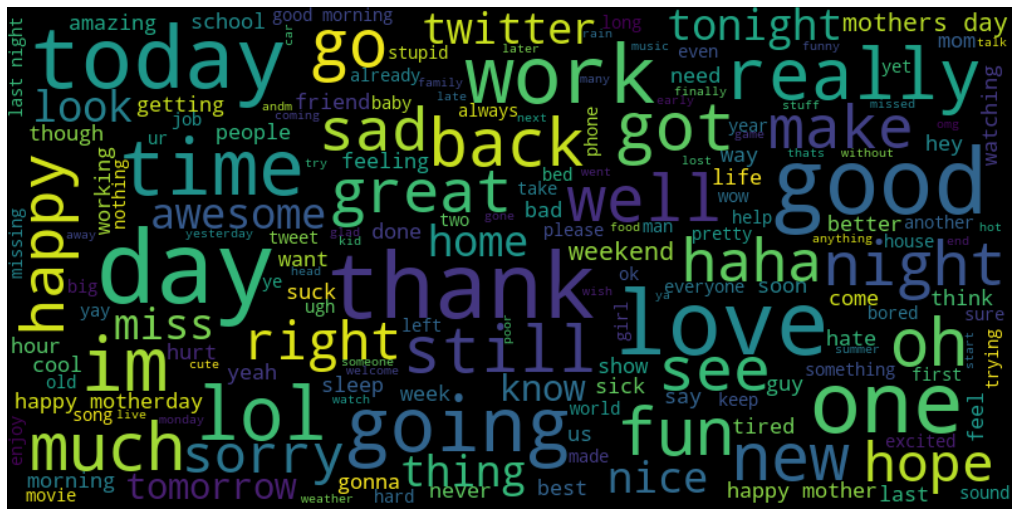

In [62]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(background_color = 'black', width = 800, height = 400,
                      max_words = 180, contour_width = 3,
                      max_font_size = 80, contour_color = 'steelblue',
                      random_state = 667)

wordcloud.generate(cleaned)

plt.figure(figsize=(18,10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")

## Bag of Words

In [63]:
X = df['text'] # FEATURES
y = df['sentiment'] # TARGET

In [64]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=1500, min_df=5, max_df=0.7)

X_ = vectorizer.fit_transform(X).toarray()
X_

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

## TF-IDF

In [65]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidfconverter = TfidfTransformer()
X_ = tfidfconverter.fit_transform(X_).toarray()
X_

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [66]:
#We can do the BOW + TF-IDF all in one with TfidfVectorizer

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X_, y,
                                                    test_size=0.25, 
                                                    random_state=667
                                                    )

In [68]:
labels = ['Negative', 'Positive']

### RandomForest

In [69]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=1000, random_state=667,max_depth=5)
classifier.fit(X_train, y_train) 

RandomForestClassifier(max_depth=5, n_estimators=1000, random_state=667)

In [70]:
# accuracy score on the test data
y_pred = classifier.predict(X_test)
test_data_accuracy = accuracy_score(y_pred, y_test)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.626741627963823


Text(69.0, 0.5, 'Actual')

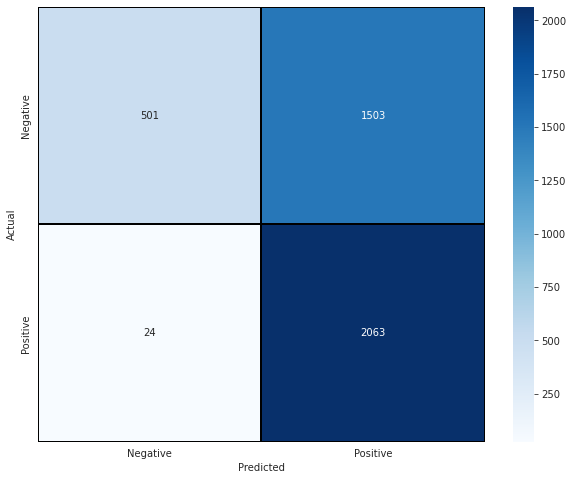

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix 

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,8))
sns.heatmap(cm,cmap= "Blues", 
            linecolor = 'black', 
            linewidth = 1, 
            annot = True, 
            fmt='', 
            xticklabels = labels, 
            yticklabels = labels)

plt.xlabel("Predicted")
plt.ylabel("Actual")

In [72]:
from sklearn.metrics import classification_report
#labels = ['class1', 'class2']
print(classification_report(y_test, y_pred, target_names=labels))

              precision    recall  f1-score   support

    Negative       0.95      0.25      0.40      2004
    Positive       0.58      0.99      0.73      2087

    accuracy                           0.63      4091
   macro avg       0.77      0.62      0.56      4091
weighted avg       0.76      0.63      0.57      4091



In [73]:
!pip install plot-metric --quiet

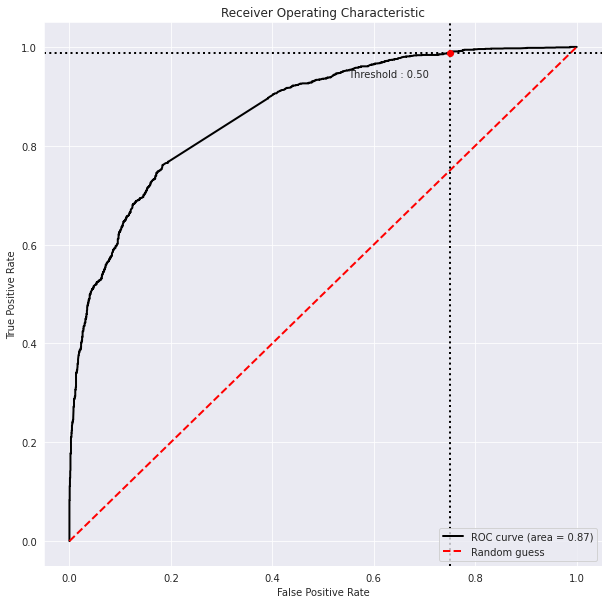

In [74]:
from plot_metric.functions import BinaryClassification
y_pred_proba = classifier.predict_proba(X_test)[::,1]

#labels = ['class1', 'class2']
bc = BinaryClassification(y_test, y_pred_proba, labels=labels)

# Figures
plt.figure(figsize=(10,10))
bc.plot_roc_curve();

### MultinomialNB

In [75]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train) 

MultinomialNB()

In [76]:
# accuracy score on the test data
y_pred = classifier.predict(X_test)
test_data_accuracy = accuracy_score(y_pred, y_test)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.814959667562943


Text(69.0, 0.5, 'Actual')

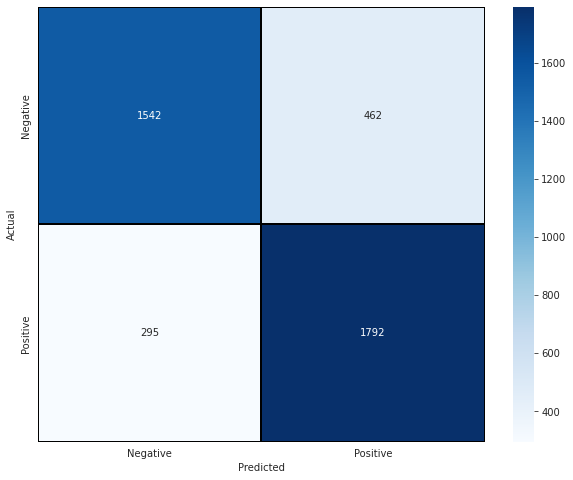

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix 

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,8))
sns.heatmap(cm,cmap= "Blues", 
            linecolor = 'black', 
            linewidth = 1, 
            annot = True, 
            fmt='', 
            xticklabels = labels, 
            yticklabels = labels)

plt.xlabel("Predicted")
plt.ylabel("Actual")

In [78]:
from sklearn.metrics import classification_report
#labels = ['class1', 'class2']
print(classification_report(y_test, y_pred, target_names=labels))

              precision    recall  f1-score   support

    Negative       0.84      0.77      0.80      2004
    Positive       0.80      0.86      0.83      2087

    accuracy                           0.81      4091
   macro avg       0.82      0.81      0.81      4091
weighted avg       0.82      0.81      0.81      4091



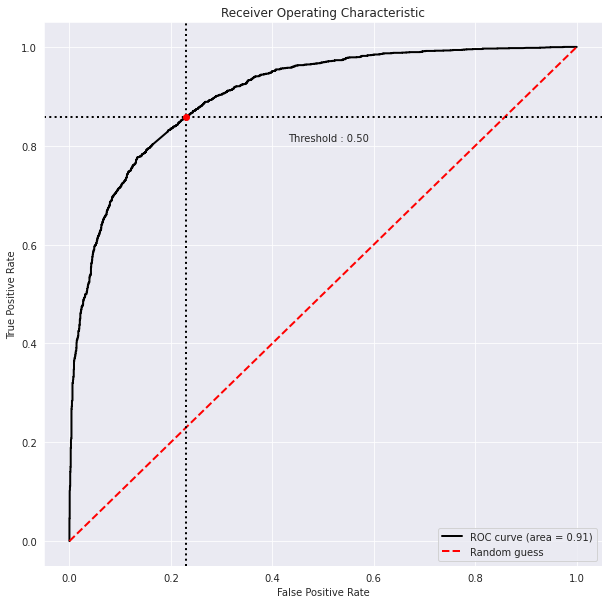

In [79]:
from plot_metric.functions import BinaryClassification
y_pred_proba = classifier.predict_proba(X_test)[::,1]

#labels = ['class1', 'class2']
bc = BinaryClassification(y_test, y_pred_proba, labels=labels)

# Figures
plt.figure(figsize=(10,10))
bc.plot_roc_curve();

### SGD Classifier

In [80]:
# accuracy score on the test data
from sklearn.linear_model import SGDClassifier

classifier = SGDClassifier(loss='log', penalty='l2',alpha=1e-3, random_state=667, max_iter=5, tol=None)
classifier.fit(X_train, y_train) 

y_pred = classifier.predict(X_test)
test_data_accuracy = accuracy_score(y_pred, y_test)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.8110486433634808


Text(69.0, 0.5, 'Actual')

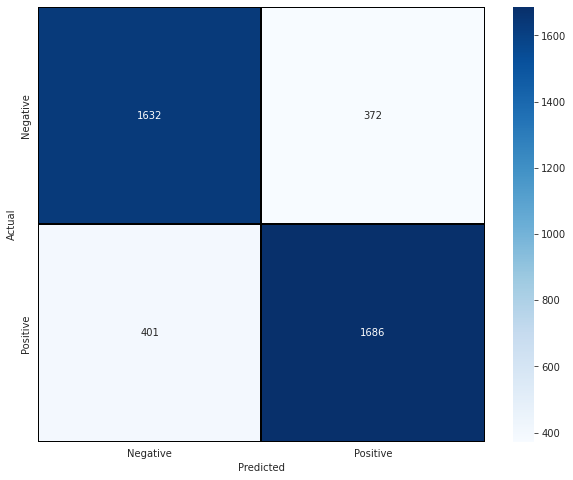

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix 

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,8))
sns.heatmap(cm,cmap= "Blues", 
            linecolor = 'black', 
            linewidth = 1, 
            annot = True, 
            fmt='', 
            xticklabels = labels, 
            yticklabels = labels)

plt.xlabel("Predicted")
plt.ylabel("Actual")

In [82]:
from sklearn.metrics import classification_report
#labels = ['class1', 'class2']
print(classification_report(y_test, y_pred, target_names=labels))

              precision    recall  f1-score   support

    Negative       0.80      0.81      0.81      2004
    Positive       0.82      0.81      0.81      2087

    accuracy                           0.81      4091
   macro avg       0.81      0.81      0.81      4091
weighted avg       0.81      0.81      0.81      4091



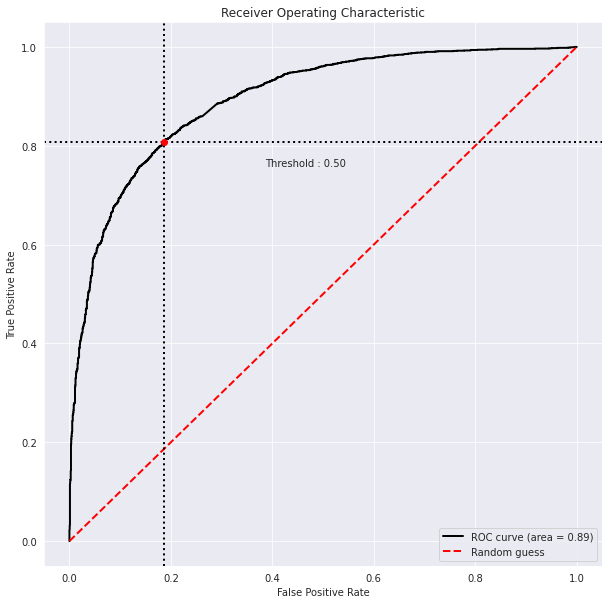

In [83]:
from plot_metric.functions import BinaryClassification
y_pred_proba = classifier.predict_proba(X_test)[::,1]

#labels = ['class1', 'class2']
bc = BinaryClassification(y_test, y_pred_proba, labels=labels)

# Figures
plt.figure(figsize=(10,10))
bc.plot_roc_curve();

## Pipeline

In [84]:
import numpy as np
X_array = np.array(X) # Cleaned data
X_train, X_test, y_train, y_test = train_test_split(X_array, y,
                                                    test_size=0.25, 
                                                    random_state=667
                                                    )

In [85]:
from sklearn.pipeline import Pipeline

bow = CountVectorizer(max_features=1500, min_df=5, max_df=0.7,stop_words=stopwords.words('english'))
tfidf = TfidfTransformer()
clf = MultinomialNB()

pipe = Pipeline([
                ('bow',bow),
                ('tfidf',tfidf),
                ('clf',clf),
                ])

pipe.fit(X_train, y_train)

predicted = pipe.predict(X_test)
test_data_accuracy = accuracy_score(predicted, y_test)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.81178196040088


In [86]:
import joblib

joblib.dump(pipe,'pipeline_classifierTF_IDF.pkl')

['pipeline_classifierTF_IDF.pkl']